## Proyecto

In [ ]:
## Importando librerías
import pandas as pd
import numpy as np
##from glob import glob

import matplotlib.pyplot as plt
## para hacer gráficos
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 9)
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
## Ingresando archivos

import pandas as pd
df = pd.read_csv('Data_1.csv', delimiter=",")
##print(df)
data = pd.DataFrame(df)

data

In [ ]:
# Analizando Data Set
data.describe()

### División Dataset

In [ ]:
#Seleccion de datos
x = data["x"]
y = data["y"]

## Division de datos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Visualizando el dataset Train
print(X_train)
print(y_train)

# Visualizando el dataset Test
print(X_test)
print(y_test)

In [ ]:
# Creando DataSets
dataTest= pd.DataFrame() 
dataTrain= pd.DataFrame() 


dataTrain['x'] = X_train
dataTrain['y'] = y_train
dataTrain

dataTest['x'] = X_test
dataTest['y'] = y_test
dataTest

#### Analizando DataTrain

In [ ]:
dataTrain.describe()

In [ ]:
dataTrain.hist()
plt.show()

In [ ]:
ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [ ]:
xcorr = dataTrain["x"]
ycorr = dataTrain["y"] 
## creando correlacion y covarianza
print(ycorr.corr(xcorr),ycorr.cov(xcorr))

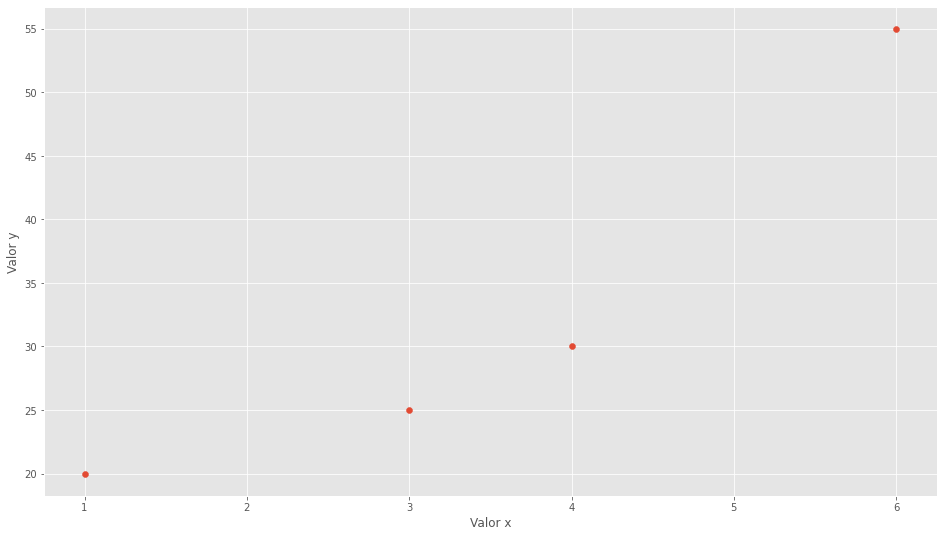

In [29]:
## Graficando Correlacion
x = dataTrain["x"]
y = dataTrain["y"]

plt.scatter(x,y)
plt.xlabel("Valor x")
plt.ylabel("Valor y")
plt.show()

### Regresion: DataTrain

In [62]:
#funcion para calcular nuevos valores
def Calcular(ciclo,betacero,betauno,alfa):
    datatemp = pd.DataFrame(DataPaso[DataPaso['Ciclo']==ciclo])    
    ResultadoError=datatemp['ErrorCuadrado'].sum()/(len(datatemp)*2)
    GradienteBeta1=datatemp['GradienteBeta1'].mean()
    GradienteBeta0=datatemp['Error'].mean()
    nuevoBeta0=betacero-alfa*datatemp['Error'].mean()
    nuevoBeta1=betauno-alfa*datatemp['GradienteBeta1'].mean()    
    return betacero,betauno,alfa,ResultadoError,GradienteBeta1,GradienteBeta0,nuevoBeta0,nuevoBeta1


#### llenado de dataframe (DataTrain)... con valores calculdos en la funcipn

In [63]:
Interacciones = pd.DataFrame(columns=['NumInteraccion', 'Beta0','Beta1','Alfa', 'ResultadoError','GradienteBeta1','GradienteBeta0','nuevoBeta0','nuevoBeta1'])

for i in range(10):
       if Interacciones.empty==True:
            alfa=0.15
            betacero=15
            betauno=1
            DataPaso=pd.DataFrame(columns=['x', 'y','Ciclo','EstimadoY', 'Error','ErrorCuadrado','GradienteBeta1'])
            DataPaso['x']=dataTrain['x']
            DataPaso['y']=dataTrain['y']
            DataPaso['Ciclo']=i
            DataPaso['EstimadoY']=dataTrain['x']*betauno+betacero
            DataPaso['Error']    =dataTrain['y']-DataPaso['EstimadoY']
            DataPaso['ErrorCuadrado']=DataPaso['Error']*DataPaso['Error']
            DataPaso['GradienteBeta1']=(DataPaso['EstimadoY']-dataTrain['y'])*dataTrain['x']
            Interacciones=Interacciones.append(pd.Series([i,
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[0],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[1],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[2],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[3],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[4],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[5],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[6],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[7]
                                                            ],index=['NumInteraccion','Beta0','Beta1','Alfa','ResultadoError','GradienteBeta1','GradienteBeta0','nuevoBeta0','nuevoBeta1']),ignore_index=True)
            
            
           
       else:
            DataPaso=pd.DataFrame(columns=['x', 'y','Ciclo','EstimadoY', 'Error','ErrorCuadrado','GradienteBeta1'])
            betacero=Interacciones.loc[Interacciones.index[-1], 'nuevoBeta0']
            betauno=Interacciones.loc[Interacciones.index[-1], 'nuevoBeta1']
            DataPaso['x']=dataTrain['x']
            DataPaso['y']=dataTrain['y']
            DataPaso['Ciclo']=i
            DataPaso['EstimadoY']=dataTrain['x']*betauno+betacero
            DataPaso['Error']    =dataTrain['y']-DataPaso['EstimadoY']
            DataPaso['ErrorCuadrado']=DataPaso['Error']*DataPaso['Error']
            DataPaso['GradienteBeta1']=(DataPaso['EstimadoY']-dataTrain['y'])*dataTrain['x']
            Interacciones=Interacciones.append(pd.Series([i,
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[0],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[1],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[2],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[3],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[4],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[5],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[6],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[7]
                                                            ],index=['NumInteraccion','Beta0','Beta1','Alfa','ResultadoError','GradienteBeta1','GradienteBeta0','nuevoBeta0','nuevoBeta1']),ignore_index=True)
            


In [41]:
#resultado de interacciones: pero me da error con mas de 25 ciclos..

Interacciones

,NumInteraccion,Beta0,Beta1,Alfa,ResultadoError,GradienteBeta1,GradienteBeta0,nuevoBeta0,nuevoBeta1
0,0.0,15.000000,1.000000,0.15,167.750000,-68.250000,14.000000,12.900000,11.237500
1,1.0,12.900000,11.237500,0.15,237.649648,83.081250,-19.731250,15.859687,-1.224687
2,2.0,15.859687,-1.224687,0.15,339.581519,-99.723750,20.926719,12.720680,13.733875
3,3.0,12.720680,13.733875,0.15,488.259823,121.147441,-28.289242,16.964066,-4.438241
4,4.0,16.964066,-4.438241,0.15,705.160212,-145.668508,31.069778,12.303599,17.412035
5,5.0,12.303599,17.412035,0.15,1021.626939,176.699139,-40.745722,18.415458,-9.092836
6,6.0,18.415458,-9.092836,0.15,1483.407901,-212.734856,45.909468,11.529037,22.817392
7,7.0,11.529037,22.817392,0.15,2157.273731,257.771213,-58.889911,20.362524,-15.848290
8,8.0,20.362524,-15.848290,0.15,3140.678674,-310.629654,67.606489,10.221550,30.746159
9,9.0,10.221550,30.746159,0.15,4575.861057,376.090884,-85.333105,23.021516,-25.667474


In [65]:
betaTrain= pd.DataFrame() 

df = Interacciones['ResultadoError'] <= min(Interacciones.ResultadoError)
betaTrain=Interacciones.loc[df]
betaTrain

,NumInteraccion,Beta0,Beta1,Alfa,ResultadoError,GradienteBeta1,GradienteBeta0,nuevoBeta0,nuevoBeta1
0,0.0,15.0,1.0,0.15,167.75,-68.25,14.0,12.9,11.2375


In [71]:
#a= betaTrain['Beta0']
a=max(betaTrain.Beta0)
a
#b= betaTrain['Beta1']
b=max(betaTrain.Beta1)
b

1.0

### Graficando Regresión DataTrain

<function matplotlib.pyplot.show(close=None, block=None)>

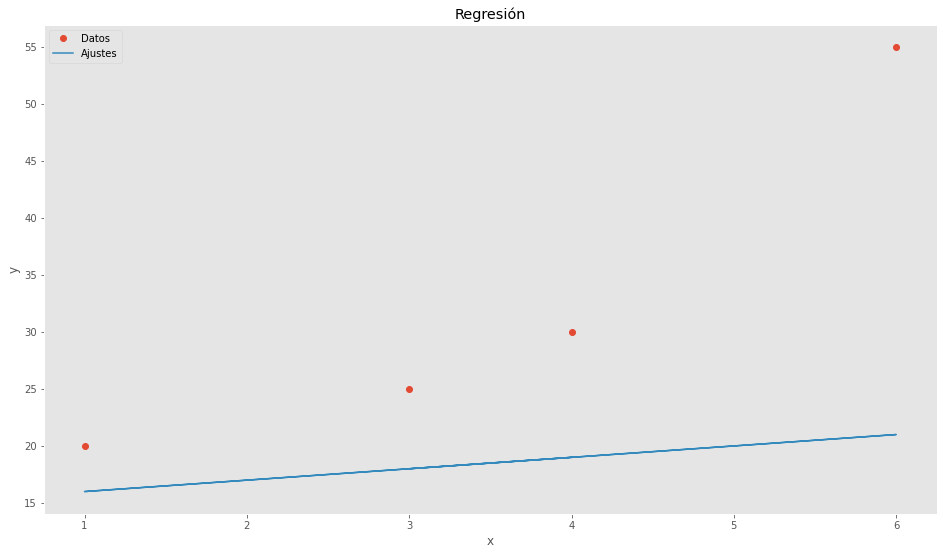

In [72]:
plt.plot(x,y,'o',label='Datos')
plt.plot(x, b*x + a, label='Ajustes')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión')
plt.grid()
plt.legend()
plt.show